In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(np.random.randn(10,4))

In [3]:
df

0         1         2         3
0 -1.140239  0.760212  2.953454  0.621341
1  0.087918  0.765059 -1.821812 -0.846534
2 -1.416090 -0.980157  0.134379 -1.554070
3  0.525000 -1.087127 -1.459450 -0.224213
4  1.601072 -0.098845  1.706151 -1.454937
5 -1.555107 -1.378899  1.243624 -0.489830
6  0.277446 -0.946208  2.306617 -1.355911
7 -1.429324 -2.381190 -0.197074 -0.790066
8  0.074103 -1.835478  0.221455 -2.136463
9  1.286583  0.642391  2.620668  0.453662

In [4]:
pieces = [df[:3], df[3:7], df[4:10]]

In [5]:
pieces

[          0         1         2         3
 0 -1.140239  0.760212  2.953454  0.621341
 1  0.087918  0.765059 -1.821812 -0.846534
 2 -1.416090 -0.980157  0.134379 -1.554070,
           0         1         2         3
 3  0.525000 -1.087127 -1.459450 -0.224213
 4  1.601072 -0.098845  1.706151 -1.454937
 5 -1.555107 -1.378899  1.243624 -0.489830
 6  0.277446 -0.946208  2.306617 -1.355911,
           0         1         2         3
 4  1.601072 -0.098845  1.706151 -1.454937
 5 -1.555107 -1.378899  1.243624 -0.489830
 6  0.277446 -0.946208  2.306617 -1.355911
 7 -1.429324 -2.381190 -0.197074 -0.790066
 8  0.074103 -1.835478  0.221455 -2.136463
 9  1.286583  0.642391  2.620668  0.453662]

In [6]:
pd.concat(pieces)

0         1         2         3
0 -1.140239  0.760212  2.953454  0.621341
1  0.087918  0.765059 -1.821812 -0.846534
2 -1.416090 -0.980157  0.134379 -1.554070
3  0.525000 -1.087127 -1.459450 -0.224213
4  1.601072 -0.098845  1.706151 -1.454937
5 -1.555107 -1.378899  1.243624 -0.489830
6  0.277446 -0.946208  2.306617 -1.355911
4  1.601072 -0.098845  1.706151 -1.454937
5 -1.555107 -1.378899  1.243624 -0.489830
6  0.277446 -0.946208  2.306617 -1.355911
7 -1.429324 -2.381190 -0.197074 -0.790066
8  0.074103 -1.835478  0.221455 -2.136463
9  1.286583  0.642391  2.620668  0.453662

In [7]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [8]:
left

key  lval
0  foo     1
1  foo     2

In [9]:
right

key  rval
0  foo     4
1  foo     5

In [10]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

In [23]:
left = pd.DataFrame({"key": ["foo", "bar", 'cin'], "lval": [1, 2, 9]})
right = pd.DataFrame({"key": ["foo", "bar", 'cin'], "rval": [4, 5, np.nan]})

In [24]:
left

key  lval
0  foo     1
1  bar     2
2  cin     9

In [25]:
right

key  rval
0  foo   4.0
1  bar   5.0
2  cin   NaN

In [26]:
pd.merge(left, right)

key  lval  rval
0  foo     1   4.0
1  bar     2   5.0
2  cin     9   NaN

In [27]:
df = pd.DataFrame(
   ....:     {
   ....:         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   ....:         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   ....:         "C": np.random.randn(8),
   ....:         "D": np.random.randn(8),
   ....:     }
   ....: )

In [28]:
df

A      B         C         D
0  foo    one  0.981623 -3.026943
1  bar    one -0.353879  0.027991
2  foo    two  0.036316  1.547072
3  bar  three  0.422202  0.989217
4  foo    two -0.220468  0.030112
5  bar    two -0.029085 -1.309110
6  foo    one  0.294737 -2.767669
7  foo  three  0.968136  1.047706

In [37]:
df.groupby("A")[['C','D']].value_counts()

A    C          D        
bar  -0.353879   0.027991    1
     -0.029085  -1.309110    1
      0.422202   0.989217    1
foo  -0.220468   0.030112    1
      0.036316   1.547072    1
      0.294737  -2.767669    1
      0.968136   1.047706    1
      0.981623  -3.026943    1
Name: count, dtype: int64

In [38]:
df.groupby("A")[['C','D']].sum()

C         D
A                      
bar  0.039238 -0.291902
foo  2.060343 -3.169722

In [39]:
df.groupby(["A", "B"])[['C','D']].value_counts()

A    B      C          D        
bar  one    -0.353879   0.027991    1
     three   0.422202   0.989217    1
     two    -0.029085  -1.309110    1
foo  one     0.294737  -2.767669    1
             0.981623  -3.026943    1
     three   0.968136   1.047706    1
     two    -0.220468   0.030112    1
             0.036316   1.547072    1
Name: count, dtype: int64

In [42]:
df.groupby(["A", "B"])[['C','D']].sum()

C         D
A   B                        
bar one   -0.353879  0.027991
    three  0.422202  0.989217
    two   -0.029085 -1.309110
foo one    1.276360 -5.794612
    three  0.968136  1.047706
    two   -0.184153  1.577184

In [43]:
df.groupby(["A", "B"])[['C','D']].sum().sum()

C    2.099582
D   -3.461625
dtype: float64

In [44]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

In [45]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

In [46]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [47]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [48]:
df

A         B
first second                    
bar   one    -1.293205 -0.712895
      two     0.446360 -0.043291
baz   one     0.584238 -0.118922
      two    -0.369576  1.663515
foo   one    -1.311074  1.852427
      two     1.296281  0.449877
qux   one    -0.245036  0.820063
      two     0.237469 -0.307877

In [49]:
df2 = df[:4]

In [50]:
df2

A         B
first second                    
bar   one    -1.293205 -0.712895
      two     0.446360 -0.043291
baz   one     0.584238 -0.118922
      two    -0.369576  1.663515

In [55]:
stacked = df2.stack()

In [56]:
stacked

first  second   
bar    one     A   -1.293205
               B   -0.712895
       two     A    0.446360
               B   -0.043291
baz    one     A    0.584238
               B   -0.118922
       two     A   -0.369576
               B    1.663515
dtype: float64

In [57]:
stacked

first  second   
bar    one     A   -1.293205
               B   -0.712895
       two     A    0.446360
               B   -0.043291
baz    one     A    0.584238
               B   -0.118922
       two     A   -0.369576
               B    1.663515
dtype: float64

In [62]:
stacked.index

MultiIndex([('bar', 'one', 'A'),
            ('bar', 'one', 'B'),
            ('bar', 'two', 'A'),
            ('bar', 'two', 'B'),
            ('baz', 'one', 'A'),
            ('baz', 'one', 'B'),
            ('baz', 'two', 'A'),
            ('baz', 'two', 'B')],
           names=['first', 'second', None])

In [63]:
stacked.unstack()

A         B
first second                    
bar   one    -1.293205 -0.712895
      two     0.446360 -0.043291
baz   one     0.584238 -0.118922
      two    -0.369576  1.663515

In [64]:
stacked

first  second   
bar    one     A   -1.293205
               B   -0.712895
       two     A    0.446360
               B   -0.043291
baz    one     A    0.584238
               B   -0.118922
       two     A   -0.369576
               B    1.663515
dtype: float64

In [65]:
stacked.to_numpy()

array([-1.29320469, -0.7128946 ,  0.44636006, -0.04329059,  0.58423772,
       -0.1189224 , -0.36957641,  1.66351509])

In [66]:
stacked.unstack().to_numpy()

array([[-1.29320469, -0.7128946 ],
       [ 0.44636006, -0.04329059],
       [ 0.58423772, -0.1189224 ],
       [-0.36957641,  1.66351509]])

In [67]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.293205  0.446360
      B -0.712895 -0.043291
baz   A  0.584238 -0.369576
      B -0.118922  1.663515

In [68]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.293205  0.584238
       B -0.712895 -0.118922
two    A  0.446360 -0.369576
       B -0.043291  1.663515

In [69]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [70]:
df

A  B    C         D         E
0     one  A  foo -1.061470  0.350517
1     one  B  foo  0.329323 -0.812136
2     two  C  foo -1.105035  0.521999
3   three  A  bar -0.012404  0.332078
4     one  B  bar  0.820310  0.520874
5     one  C  bar  0.770293  1.079676
6     two  A  foo  1.210237 -1.322800
7   three  B  foo -0.448982 -0.741048
8     one  C  foo -0.182740 -1.240916
9     one  A  bar -0.495412 -1.072328
10    two  B  bar  0.605505  0.694294
11  three  C  bar -0.555842  0.233356

In [71]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])


C             bar       foo
A     B                    
one   A -0.495412 -1.061470
      B  0.820310  0.329323
      C  0.770293 -0.182740
three A -0.012404       NaN
      B       NaN -0.448982
      C -0.555842       NaN
two   A       NaN  1.210237
      B  0.605505       NaN
      C       NaN -1.105035

In [73]:
pd.pivot_table(df, values=["D", "E"], index=["A", "B"], columns=["C"])


D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -0.495412 -1.061470 -1.072328  0.350517
      B  0.820310  0.329323  0.520874 -0.812136
      C  0.770293 -0.182740  1.079676 -1.240916
three A -0.012404       NaN  0.332078       NaN
      B       NaN -0.448982       NaN -0.741048
      C -0.555842       NaN  0.233356       NaN
two   A       NaN  1.210237       NaN -1.322800
      B  0.605505       NaN  0.694294       NaN
      C       NaN -1.105035       NaN  0.521999

In [76]:
rng = pd.date_range("1/1/2012", periods=100)

In [77]:
rng

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-14', '2012-01-15', '2012-01-16',
               '2012-01-17', '2012-01-18', '2012-01-19', '2012-01-20',
               '2012-01-21', '2012-01-22', '2012-01-23', '2012-01-24',
               '2012-01-25', '2012-01-26', '2012-01-27', '2012-01-28',
               '2012-01-29', '2012-01-30', '2012-01-31', '2012-02-01',
               '2012-02-02', '2012-02-03', '2012-02-04', '2012-02-05',
               '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09',
               '2012-02-10', '2012-02-11', '2012-02-12', '2012-02-13',
               '2012-02-14', '2012-02-15', '2012-02-16', '2012-02-17',
               '2012-02-18', '2012-02-19', '2012-02-20', '2012-02-21',
               '2012-02-22', '2012-02-23', '2012-02-24', '2012-02-25',
      

In [78]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [79]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [80]:
rng = pd.date_range("1/1/2012", periods=100, freq="W")

In [82]:
rng

DatetimeIndex(['2012-01-01', '2012-01-08', '2012-01-15', '2012-01-22',
               '2012-01-29', '2012-02-05', '2012-02-12', '2012-02-19',
               '2012-02-26', '2012-03-04', '2012-03-11', '2012-03-18',
               '2012-03-25', '2012-04-01', '2012-04-08', '2012-04-15',
               '2012-04-22', '2012-04-29', '2012-05-06', '2012-05-13',
               '2012-05-20', '2012-05-27', '2012-06-03', '2012-06-10',
               '2012-06-17', '2012-06-24', '2012-07-01', '2012-07-08',
               '2012-07-15', '2012-07-22', '2012-07-29', '2012-08-05',
               '2012-08-12', '2012-08-19', '2012-08-26', '2012-09-02',
               '2012-09-09', '2012-09-16', '2012-09-23', '2012-09-30',
               '2012-10-07', '2012-10-14', '2012-10-21', '2012-10-28',
               '2012-11-04', '2012-11-11', '2012-11-18', '2012-11-25',
               '2012-12-02', '2012-12-09', '2012-12-16', '2012-12-23',
               '2012-12-30', '2013-01-06', '2013-01-13', '2013-01-20',
      

In [83]:
rng = pd.date_range("1/1/2012", periods=100, freq="M")

In [84]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [85]:
rng = pd.date_range("1/1/2012", periods=100, freq="Y")

In [86]:
rng

DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31', '2022-12-31', '2023-12-31',
               '2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31', '2030-12-31', '2031-12-31',
               '2032-12-31', '2033-12-31', '2034-12-31', '2035-12-31',
               '2036-12-31', '2037-12-31', '2038-12-31', '2039-12-31',
               '2040-12-31', '2041-12-31', '2042-12-31', '2043-12-31',
               '2044-12-31', '2045-12-31', '2046-12-31', '2047-12-31',
               '2048-12-31', '2049-12-31', '2050-12-31', '2051-12-31',
               '2052-12-31', '2053-12-31', '2054-12-31', '2055-12-31',
               '2056-12-31', '2057-12-31', '2058-12-31', '2059-12-31',
               '2060-12-31', '2061-12-31', '2062-12-31', '2063-12-31',
               '2064-12-31', '2065-12-31', '2066-12-31', '2067-12-31',
      

In [93]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [94]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [95]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [96]:
ts

2012-01-01 00:00:00    410
2012-01-01 00:00:01    352
2012-01-01 00:00:02    187
2012-01-01 00:00:03    325
2012-01-01 00:00:04    124
                      ... 
2012-01-01 00:01:35    210
2012-01-01 00:01:36    275
2012-01-01 00:01:37    462
2012-01-01 00:01:38    485
2012-01-01 00:01:39    171
Freq: S, Length: 100, dtype: int64

In [97]:
ts.resample("5Min").sum()

2012-01-01    26581
Freq: 5T, dtype: int64

In [108]:
ts.resample("10Min").sum()

2012-01-01    26581
Freq: 10T, dtype: int64

In [109]:
rng = pd.date_range("3/6/2012", periods=5, freq='D')

In [110]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [117]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [118]:
ts

2012-03-06   -1.231218
2012-03-07   -1.186152
2012-03-08   -0.378533
2012-03-09   -0.054723
2012-03-10    1.144039
Freq: D, dtype: float64

In [123]:
ts = pd.Series(np.random.randn(len(rng)), index=rng, name="ts")

In [124]:
ts

2012-03-06   -2.289220
2012-03-07    1.149095
2012-03-08    0.789448
2012-03-09   -1.424680
2012-03-10   -0.738940
Freq: D, Name: ts, dtype: float64

In [125]:
ts_utc = ts.tz_localize("UTC")


In [126]:
ts_utc

2012-03-06 00:00:00+00:00   -2.289220
2012-03-07 00:00:00+00:00    1.149095
2012-03-08 00:00:00+00:00    0.789448
2012-03-09 00:00:00+00:00   -1.424680
2012-03-10 00:00:00+00:00   -0.738940
Freq: D, Name: ts, dtype: float64

In [127]:
ts_utc.tz_convert("US/Eastern")


2012-03-05 19:00:00-05:00   -2.289220
2012-03-06 19:00:00-05:00    1.149095
2012-03-07 19:00:00-05:00    0.789448
2012-03-08 19:00:00-05:00   -1.424680
2012-03-09 19:00:00-05:00   -0.738940
Freq: D, Name: ts, dtype: float64

In [151]:
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [152]:
rng + pd.offsets.BusinessDay(5)


DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)

In [153]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [154]:
df

id raw_grade
0   1         a
1   2         b
2   3         b
3   4         a
4   5         a
5   6         e

In [155]:
df["grade"] = df["raw_grade"].astype("category")


In [156]:
df

id raw_grade grade
0   1         a     a
1   2         b     b
2   3         b     b
3   4         a     a
4   5         a     a
5   6         e     e

In [157]:
df['raw_grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [158]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [159]:
new_categories = ["very good", "good", "very bad"]


In [160]:
df["grade"] = df["grade"].cat.rename_categories(new_categories)


In [161]:
df

id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e   very bad

In [166]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [167]:
df

id raw_grade      grade
0   1         a  very good
1   2         b       good
2   3         b       good
3   4         a  very good
4   5         a  very good
5   6         e        NaN

In [168]:
import matplotlib.pyplot as plt


In [169]:
plt.close("all")

In [176]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [177]:
ts

2000-01-01   -0.230422
2000-01-02   -0.067247
2000-01-03    0.418113
2000-01-04   -1.940695
2000-01-05    0.481252
                ...   
2002-09-22    2.080511
2002-09-23    1.089469
2002-09-24    0.444998
2002-09-25    0.069345
2002-09-26    0.000417
Freq: D, Length: 1000, dtype: float64

<Axes: >

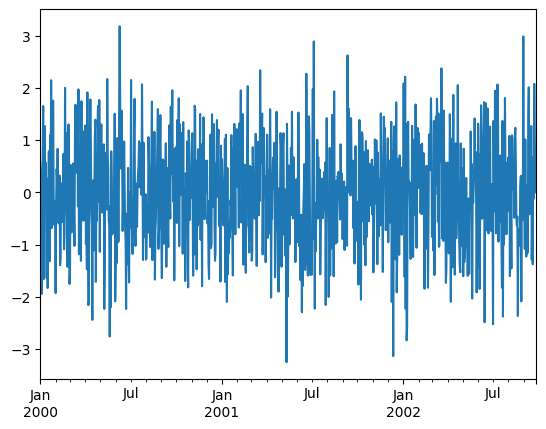

In [178]:
ts.plot()

In [179]:
ts = ts.cumsum()

In [180]:
ts

2000-01-01    -0.230422
2000-01-02    -0.297669
2000-01-03     0.120445
2000-01-04    -1.820250
2000-01-05    -1.338999
                ...    
2002-09-22   -19.164716
2002-09-23   -18.075247
2002-09-24   -17.630250
2002-09-25   -17.560904
2002-09-26   -17.560488
Freq: D, Length: 1000, dtype: float64

<Axes: >

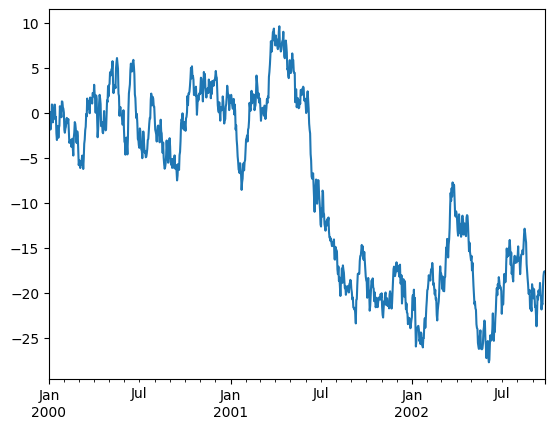

In [181]:
ts.plot()

In [182]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [183]:
df

A         B         C         D
2000-01-01 -1.059840 -0.048059  0.790629 -0.068302
2000-01-02  0.237354  2.205644  0.737123 -1.136563
2000-01-03 -1.698962  1.954039  0.963892 -0.349676
2000-01-04 -1.137210 -0.788457  0.057160  0.717402
2000-01-05  0.876871 -1.748605 -1.429354  0.378444
...              ...       ...       ...       ...
2002-09-22  1.905433  0.887962  0.389925  0.971564
2002-09-23  0.754643 -2.451467 -1.386089 -0.527915
2002-09-24 -0.417225 -0.383555  0.246189 -0.814934
2002-09-25  1.086829  0.478131  1.273341 -1.436775
2002-09-26 -0.629808  1.115297 -0.819631  1.127358

[1000 rows x 4 columns]

In [184]:
df = df.cumsum()

In [185]:
df

A          B          C          D
2000-01-01 -1.059840  -0.048059   0.790629  -0.068302
2000-01-02 -0.822486   2.157584   1.527752  -1.204865
2000-01-03 -2.521448   4.111624   2.491644  -1.554541
2000-01-04 -3.658658   3.323167   2.548803  -0.837139
2000-01-05 -2.781786   1.574562   1.119449  -0.458696
...              ...        ...        ...        ...
2002-09-22 -5.212772  34.597399 -13.495744 -30.390655
2002-09-23 -4.458129  32.145932 -14.881833 -30.918570
2002-09-24 -4.875354  31.762377 -14.635644 -31.733504
2002-09-25 -3.788525  32.240508 -13.362302 -33.170279
2002-09-26 -4.418333  33.355805 -14.181933 -32.042921

[1000 rows x 4 columns]

<Axes: >

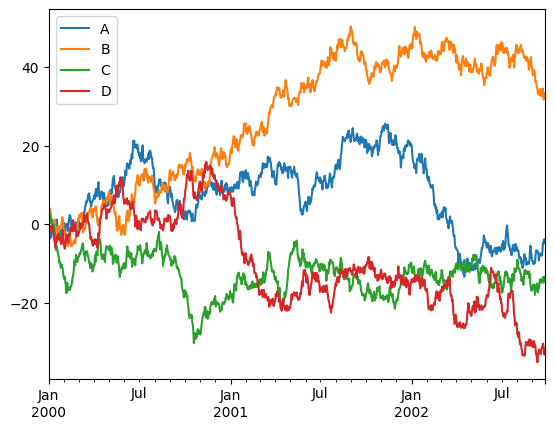

In [186]:
df.plot()

In [187]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: >

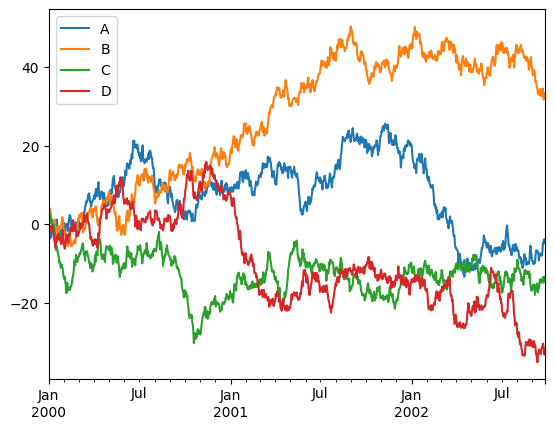

In [188]:
df.plot()

In [190]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))

In [191]:
df

0  1  2  3  4
0  2  1  3  0  2
1  0  2  3  4  3
2  3  1  1  0  1
3  3  1  3  3  1
4  2  3  1  2  4
5  2  1  0  1  3
6  1  1  4  0  2
7  1  4  3  2  0
8  0  0  1  0  4
9  3  1  4  3  4

In [192]:
df.to_csv("foo.csv")

In [193]:
pd.read_csv("foo.csv")

Unnamed: 0  0  1  2  3  4
0           0  2  1  3  0  2
1           1  0  2  3  4  3
2           2  3  1  1  0  1
3           3  3  1  3  3  1
4           4  2  3  1  2  4
5           5  2  1  0  1  3
6           6  1  1  4  0  2
7           7  1  4  3  2  0
8           8  0  0  1  0  4
9           9  3  1  4  3  4

In [195]:
df.to_parquet("foo.parquet")

In [196]:
pd.read_parquet("foo.parquet")

0  1  2  3  4
0  2  1  3  0  2
1  0  2  3  4  3
2  3  1  1  0  1
3  3  1  3  3  1
4  2  3  1  2  4
5  2  1  0  1  3
6  1  1  4  0  2
7  1  4  3  2  0
8  0  0  1  0  4
9  3  1  4  3  4

In [199]:
df.to_excel("foo.xlsx", sheet_name="foo")

In [200]:
pd.read_excel("foo.xlsx")

Unnamed: 0  0  1  2  3  4
0           0  2  1  3  0  2
1           1  0  2  3  4  3
2           2  3  1  1  0  1
3           3  3  1  3  3  1
4           4  2  3  1  2  4
5           5  2  1  0  1  3
6           6  1  1  4  0  2
7           7  1  4  3  2  0
8           8  0  0  1  0  4
9           9  3  1  4  3  4